In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('result.csv')
df.head()

,seat_no,prn,centre,total_gradepoints,sgpi,status,year_of_admission,clg_id,gender
0,5201541,2020016402260361,Mumbai,201.0,9.14,Successful,2020,10,M
1,5201542,2020016402258942,Mumbai,178.0,8.09,Successful,2020,10,M
2,5201543,2018016402446735,Mumbai,175.0,7.95,Successful,2018,10,M
3,5201544,2019016402401026,Mumbai,166.0,7.55,Successful,2019,10,M
4,5201545,2019016402401011,Mumbai,177.0,8.05,Successful,2019,10,M


In [36]:
df.isna().sum()

seat_no               0
prn                   0
centre               21
total_gradepoints     0
sgpi                  0
status                0
year_of_admission     0
clg_id                0
gender                0
dtype: int64

In [37]:
df.shape

(5211, 9)

In [38]:
df = df.dropna()
df.columns

Index(['seat_no', 'prn', 'centre', 'total_gradepoints', 'sgpi', 'status',
       'year_of_admission', 'clg_id', 'gender'],
      dtype='object')

In [39]:
df = df.drop(['seat_no', 'prn','total_gradepoints','clg_id'],axis=1)

In [40]:
df.head()

,centre,sgpi,status,year_of_admission,gender
0,Mumbai,9.14,Successful,2020,M
1,Mumbai,8.09,Successful,2020,M
2,Mumbai,7.95,Successful,2018,M
3,Mumbai,7.55,Successful,2019,M
4,Mumbai,8.05,Successful,2019,M


In [41]:
cols = ['centre','sgpi', 'status',
       'year_of_admission','gender']
for col in cols:
    print(col,df[col].unique(),sep=' : ')

centre : ['Mumbai' 'Kalyan' 'Panvel' 'Thane' 'Karjat' 'Vasai' 'Sangameshwar'
 'Andheri' 'BORIVALI' 'Kankavli' 'Khed' 'Shahapur' 'Palghar' 'Tala'
 'Malvan' 'Uran' 'Wada']
sgpi : [ 9.14  8.09  7.95  7.55  8.05  7.32  7.09  8.45  7.5   0.    7.82  6.68
  8.59  7.36  9.05  8.68  6.64  8.64  8.5   7.91  7.86  8.36  8.91  7.05
  6.5   8.23  7.73  7.64  6.91  8.32  5.77  6.32  5.82  7.41  8.77  8.27
  9.45  9.32  9.59  7.27  7.68  7.23  7.    6.73  6.59  7.45  7.18  6.86
  9.86  9.18  6.77  8.    6.18  6.41  6.    7.14  6.45  8.18  6.95  6.09
  8.41  6.55  8.73  9.    6.27  7.77  9.27  6.82  7.59  5.95  6.36  8.55
  8.14  8.86  9.23  6.05  9.09  6.23 10.    8.95  9.55  9.41  8.82  5.64
  9.5   9.73  6.14  9.36  5.45  5.68  9.77  9.82  9.64  9.68  5.86  5.91
  5.73  5.59]
status : ['Successful ' 'Unsuccessful ' 'RR ' 'UM ' 'ABS ']
year_of_admission : [2020 2018 2019 2017 2014 2022 2016 2021]
gender : ['M' 'F']


In [42]:
df['status'] = df['status'].str.strip()

In [43]:
df_successful = df[df['status'] == "Successful"]
df_unsuccessful = df[df['status'] == "Unsuccessful"]

# Passout percentage in region by gender

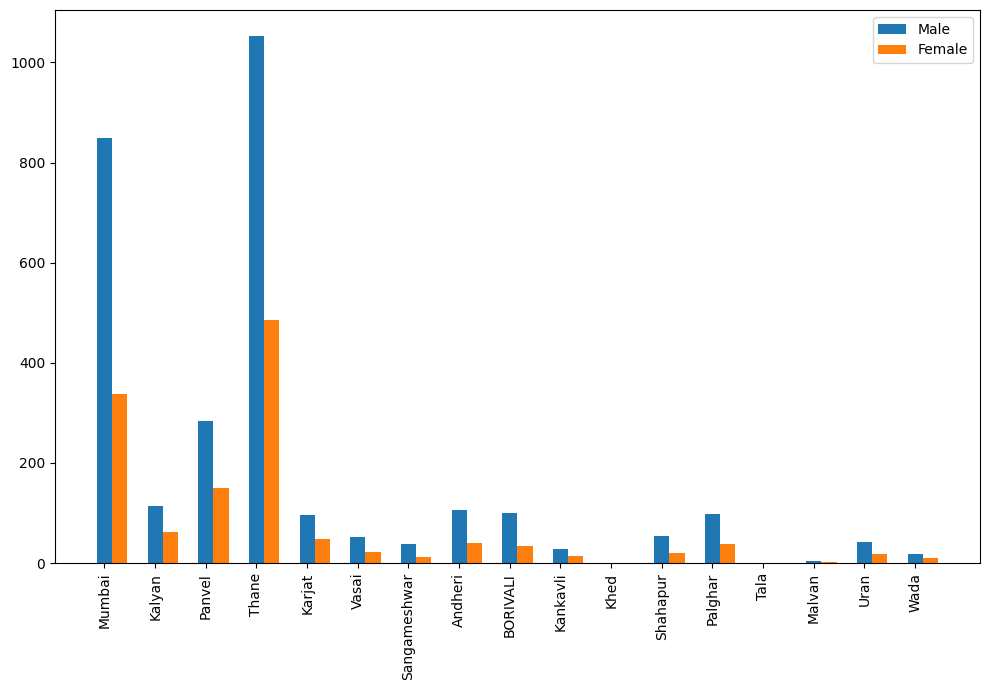

In [44]:
regions = ['Mumbai','Kalyan','Panvel','Thane','Karjat','Vasai','Sangameshwar','Andheri','BORIVALI','Kankavli','Khed','Shahapur','Palghar','Tala',
 'Malvan','Uran','Wada']
males = []
females = []
index = np.arange(len(regions))
bar_width = 0.3
plt.figure(figsize=(10,7))
for region in regions:
    males.append(len(df_successful[(df_successful['gender']=='M') & (df_successful['centre']==region)]))
    females.append(len(df_successful[(df_successful['gender']=='F') & (df_successful['centre']==region)]))
plt.bar(index,males,bar_width,label="Male")
plt.bar(index+bar_width,females,bar_width,label="Female")
plt.xticks(index,regions,rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Passout percentage by region

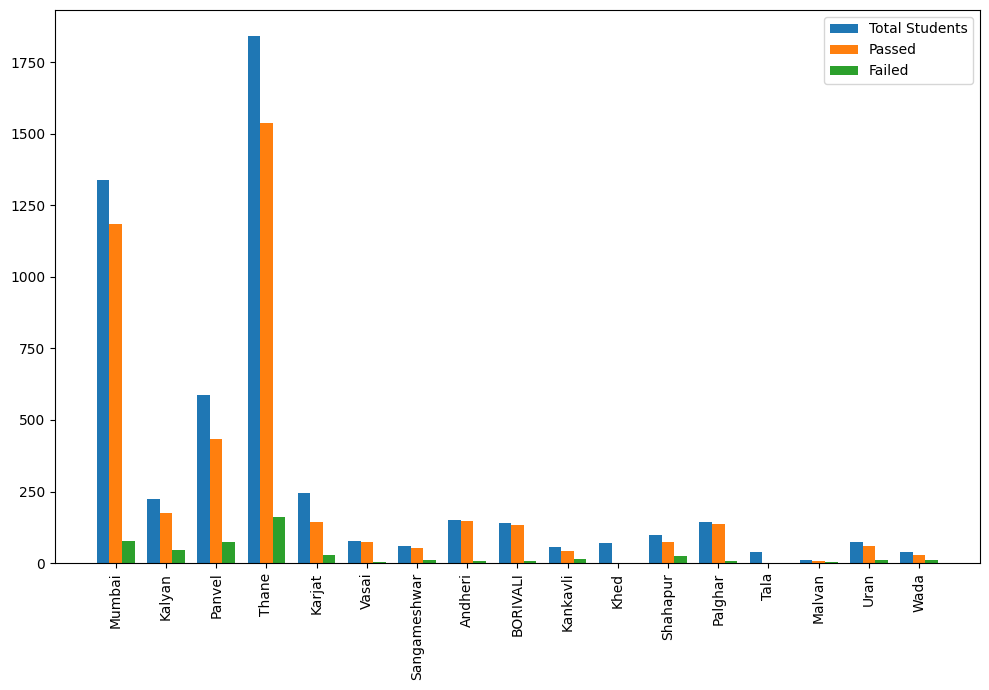

In [45]:
regions = ['Mumbai','Kalyan','Panvel','Thane','Karjat','Vasai','Sangameshwar','Andheri','BORIVALI','Kankavli','Khed','Shahapur','Palghar','Tala',
 'Malvan','Uran','Wada']
succ = []
unsucc = []
total = []
bar_width = 0.25
index = np.arange(len(regions))
plt.figure(figsize=(10,7))
for region in regions:
    total.append(len(df[df['centre']==region]))
    succ.append(len(df_successful[df_successful['centre']==region]))
    unsucc.append(len(df_unsuccessful[df_unsuccessful['centre']==region]))
plt.bar(index,total,bar_width,label="Total Students")
plt.bar(index+bar_width,succ,bar_width,label="Passed")
plt.bar(index+2*bar_width,unsucc,bar_width,label="Failed")
plt.xticks(index+bar_width,regions,rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Trends in SGPI

In [46]:
avg_sgpi = []
years=[2020, 2018, 2019, 2017, 2014, 2022, 2016, 2021]
years.sort()
for year in years:
    temp = df_successful[df_successful['year_of_admission']==year]
    avg_sgpi.append(round(temp['sgpi'].mean(),2))
print(years)
print(avg_sgpi)

[2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[6.86, 6.91, 6.99, 7.3, 7.97, 7.63, 7.73, 7.73]


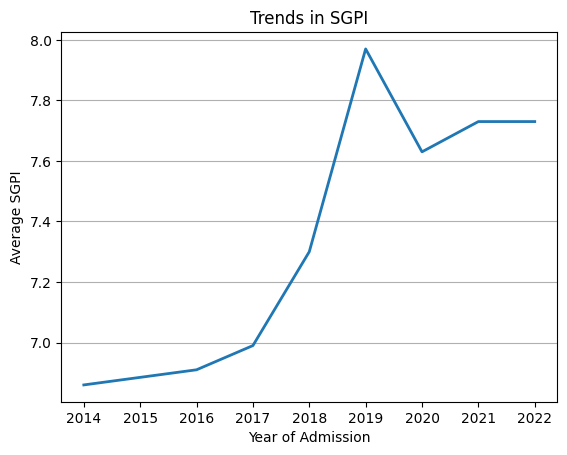

In [47]:
plt.plot(years,avg_sgpi,linewidth='2')
plt.ylabel("Average SGPI")
plt.xlabel("Year of Admission")
plt.grid(axis='y')
plt.title("Trends in SGPI")
plt.show()

# Successful and Unsuccessful by gender

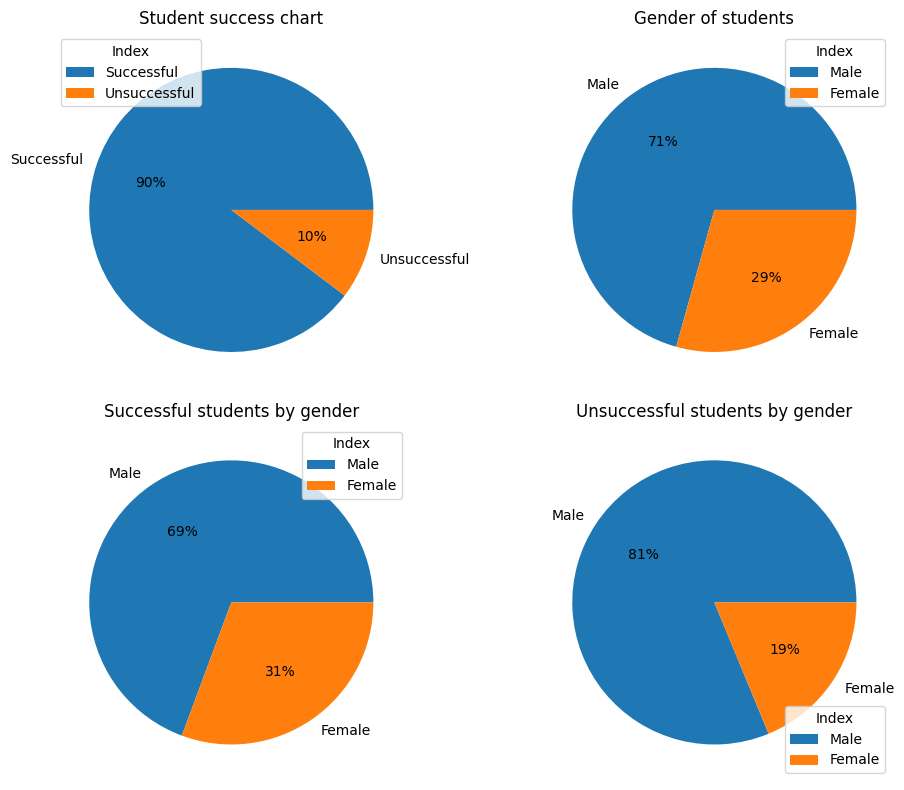

In [48]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
axes[0,0].pie([len(df_successful),len(df_unsuccessful)],labels=['Successful', 'Unsuccessful'],autopct="%1.0f%%")
axes[0,0].set_title("Student success chart")
axes[0,0].legend(title="Index")

df_male = df[df['gender'] == "M"]
df_female = df[df['gender'] == "F"]
axes[0,1].pie([len(df_male),len(df_female)],labels=["Male","Female"],autopct="%1.0f%%")
axes[0,1].set_title("Gender of students")
axes[0,1].legend(title="Index")

df_succ_male = df_successful[df_successful['gender'] == "M"]
df_succ_female = df_successful[df_successful['gender'] == "F"]
axes[1,0].pie([len(df_succ_male),len(df_succ_female)],labels=["Male","Female"],autopct="%1.0f%%")
axes[1,0].set_title("Successful students by gender")
axes[1,0].legend(title="Index")

df_unsucc_male = df_unsuccessful[df_unsuccessful['gender'] == "M"]
df_unsucc_female = df_unsuccessful[df_unsuccessful['gender'] == "F"]
axes[1,1].pie([len(df_unsucc_male),len(df_unsucc_female)],labels=["Male","Female"],autopct="%1.0f%%")
axes[1,1].set_title("Unsuccessful students by gender")
axes[1,1].legend(title="Index")
plt.tight_layout()
plt.show()